<a href="https://colab.research.google.com/github/GundlaTrinath/Gold-prediction/blob/main/gold_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Gold Price Prediction

## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

## Task 1: Initial Data Exploration

In [ ]:
gold_data=pd.read_csv('/content/gold_price.csv', parse_dates=True, index_col='Date')

In [ ]:
gold_data.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [ ]:
gold_data.shape

(4718, 6)

In [ ]:
correlation=gold_data.corr()

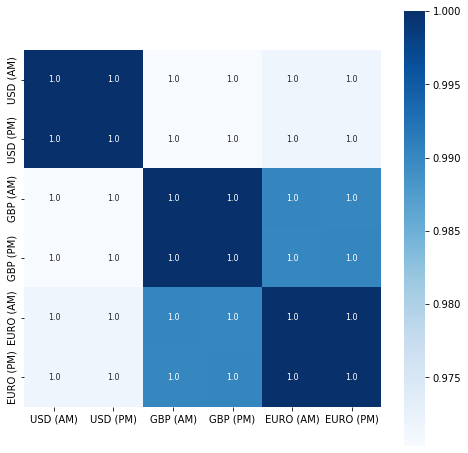

In [ ]:
from numpy import square
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True, square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

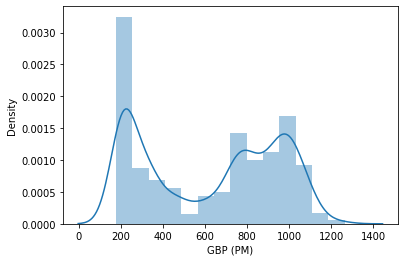

In [ ]:
sns.distplot(gold_data['GBP (PM)'])

## Task 2: Create Train & Test Sets

In [ ]:
gold_data['Return'] = gold_data['GBP (PM)'].pct_change() * 100
gold_data['Lagged_Return'] = gold_data.Return.shift()
gold_data = gold_data.dropna()
train = gold_data['2001':'2018']
test = gold_data['2019']
# Create train and test sets for dependent and independent variables
X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

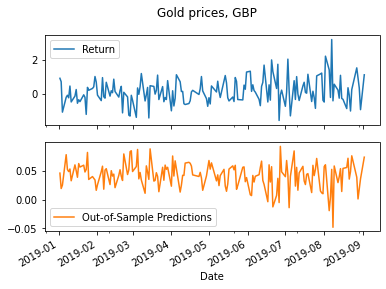

In [ ]:
out_of_sample_results = y_test.to_frame()
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)
out_of_sample_results.plot(subplots=True, title='Gold prices, GBP')
plt.show()

## Task 3: Develop Models & Predictions

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

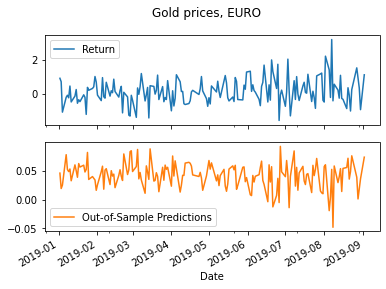

In [ ]:
out_of_sample_results = y_test.to_frame()
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)
out_of_sample_results.plot(subplots=True, title='Gold prices, EURO')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
